Assignment # 5 CompSci X 433.6

In [294]:
from os.path import join, dirname, abspath
import xlrd
import numpy as np
import matplotlib.pyplot as plt

In [295]:
ht = lambda x,y: (x*12 + y) #height return 

In [296]:
import pandas as pd
xl = pd.ExcelFile("Assignment_1_Data_and_Template.xlsx")
df = xl.parse(xl.sheet_names[0])
df.head()

,Height_Feet,Height_Inches,Gender
0,5,10,Male
1,6,4,Male
2,5,10,Male
3,5,9,Male
4,5,7,Female


In [297]:
df['height']=ht(df.Height_Feet,df.Height_Inches)
df.head()

,Height_Feet,Height_Inches,Gender,height
0,5,10,Male,70
1,6,4,Male,76
2,5,10,Male,70
3,5,9,Male,69
4,5,7,Female,67


In [298]:
df = df.sort_values(['height', 'Gender'], ascending=[1, 1])
A = df.reset_index().values

In [299]:
df.head()

,Height_Feet,Height_Inches,Gender,height
2781,4,4,Female,52
7601,4,4,Female,52
7871,4,4,Female,52
5132,4,5,Female,53
6853,4,5,Female,53


In [300]:
print(A.shape)

(16700, 5)


In [301]:
AT=np.transpose(A)

In [302]:
AT

array([[2781, 7601, 7871, ..., 8656, 14785, 15242],
       [4, 4, 4, ..., 6, 6, 6],
       [4, 4, 4, ..., 10, 10, 11],
       ['Female', 'Female', 'Female', ..., 'Male', 'Male', 'Male'],
       [52, 52, 52, ..., 82, 82, 83]], dtype=object)

In [303]:
X=AT[4]

In [304]:
print(X)
print(np.max(X))
print(np.min(X))


[52 52 52 ..., 82 82 83]
83
52


In [305]:
T=AT[3]

In [306]:
print(T)

['Female' 'Female' 'Female' ..., 'Male' 'Male' 'Male']


In [307]:
NumTN=(T == "Female").sum()
NumTP=(T == "Male").sum()
NumT = np.count_nonzero(T)
print("Females = {}, Males = {}, Total = {}".format(NumTN,NumTP, NumT))

Females = 8900, Males = 7800, Total = 16700


In [309]:
T[T == 'Female'] = -1
T[T == 'Male'] = 1
print(T)

[-1 -1 -1 ..., 1 1 1]


In [244]:
B=32

In [245]:
def Build1HistogramClassifierF(X,T,B,xmin,xmax):
    HF=np.zeros(B).astype('int32')
    HM=np.zeros(B).astype('int32')
    for i in range(0,X.size):
        b=(np.round(((B-1)*(X[i]-xmin)/(xmax-xmin)))).astype('int32')
        if T[i]=='Female':
            HF[b]+=1;
        else:
            HM[b]+=1;
    return HF, HM

In [246]:
HISTF,HISTM = Build1HistogramClassifierF(X,T,32,np.min(X),np.max(X))

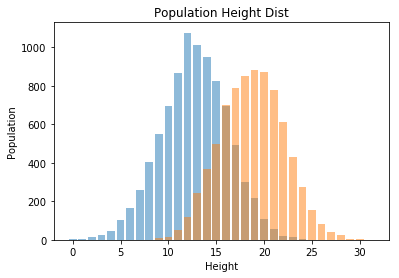

In [247]:
y_pos = np.arange(len(HISTF))
plt.bar(y_pos, HISTF, align='center', alpha=0.5)
plt.bar(y_pos, HISTM, align='center', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Population')
plt.title('Population Height Dist')
plt.show()



In [248]:
print("Min Height = {}".format(np.min(X)))
print("Max Height = {}".format(np.max(X)))


Min Height = 52
Max Height = 83


In [249]:
print("Histogram Female = {}".format(HISTF))

Histogram Female = [   3    5   12   24   44  101  163  260  404  549  693  869 1076 1013  951
  823  695  494  299  217  110   58   20   12    5    0    0    0    0    0
    0    0]


In [250]:
print("Histogram Male = {}".format(HISTM))

Histogram Male = [  0   0   0   0   0   0   0   0   1  10  14  53 117 241 369 500 700 787
 849 882 873 779 610 432 274 155  83  38  24   5   3   1]


In [251]:
wt = np.array(range(np.min(X), np.max(X)+1))
print(wt)

[52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83]


In [252]:
def CompMeanSD(hist, wt):
    hsum = np.dot(hist, wt)
    hnum = np.sum(hist)
    hmean = hsum/hnum
    wtsq = wt*wt
    hvar = ((np.dot(hist,wtsq))/hnum) - hmean*hmean
    hsd = np.sqrt(hvar)
    return hnum, hmean, hsd


In [253]:
def CompMeanSDPartioalData(hist, wt):
    hsum = np.dot(hist, wt)
    hnum = np.sum(hist)
    hmean = hsum/hnum
    hdiff = wt - hmean
    hdiffsq = hdiff*hdiff
    hvar = (np.dot(hist,hdiffsq))/(hnum-1)
    hsd = np.sqrt(hvar)
    return hnum, hmean, hsd


In [254]:
Fnum, Fmean, Fsd = CompMeanSD(HISTF, wt)
print("Female Height: Mean = {}, Standard Deviation = {}, Number = {}".format(Fmean,Fsd,Fnum))


Female Height: Mean = 64.72573033707866, Standard Deviation = 3.478239057126026, Number = 8900


In [255]:
"""
Fsum = np.dot(HISTF, wt)
Fnum = np.sum(HISTF)
Fmean = Fsum/Fnum
wtsq = wt*wt
Fvar = ((np.dot(HISTF,wtsq))/Fnum) - Fmean*Fmean
Fsd = np.sqrt(Fvar)
print("Female Height: Mean = {}, Standard Deviation = {}, Number = {}".format(Fmean,Fsd,Fnum))
"""


'\nFsum = np.dot(HISTF, wt)\nFnum = np.sum(HISTF)\nFmean = Fsum/Fnum\nwtsq = wt*wt\nFvar = ((np.dot(HISTF,wtsq))/Fnum) - Fmean*Fmean\nFsd = np.sqrt(Fvar)\nprint("Female Height: Mean = {}, Standard Deviation = {}, Number = {}".format(Fmean,Fsd,Fnum))\n'

In [256]:
Mnum, Mmean, Msd = CompMeanSD(HISTM, wt)
print("Male Height: Mean = {}, Standard Deviation = {}, Number = {}".format(Mmean,Msd,Mnum))


Male Height: Mean = 70.76807692307692, Standard Deviation = 3.3094552025481083, Number = 7800


In [257]:
"""
Msum = np.dot(HISTM, wt)
Mnum = np.sum(HISTM)
Mmean = Msum/Mnum
Mvar = ((np.dot(HISTM,wtsq))/Mnum) - Mmean*Mmean
Msd = np.sqrt(Mvar)

print("Male Height: Mean = {}, Standard Deviation = {}, Number = {}".format(Mmean,Msd,Mnum))
"""

'\nMsum = np.dot(HISTM, wt)\nMnum = np.sum(HISTM)\nMmean = Msum/Mnum\nMvar = ((np.dot(HISTM,wtsq))/Mnum) - Mmean*Mmean\nMsd = np.sqrt(Mvar)\n\nprint("Male Height: Mean = {}, Standard Deviation = {}, Number = {}".format(Mmean,Msd,Mnum))\n'

In [258]:
def QueryHist(histo, val, offset, num):
    return (histo[val-offset]/num)

In [259]:
queryhist = lambda histo, val, offset, num: (histo[val-offset]/num) #height return 

In [260]:
prf55=queryhist(HISTF,55,np.min(X),Fnum)
print(prf55)

0.00269662921348


In [261]:
prf55=QueryHist(HISTF,55,np.min(X),Fnum)
print(prf55)

0.00269662921348


In [262]:
sum=0
for i in range(52,84):
    sum+=queryhist(HISTF,i,np.min(X),Fnum)
    print
print(sum)

1.0


In [263]:
Vdist = np.array(range(55,85,5))
Fdist = np.zeros(6)
for i in range(0,6,1):
    Fdist[i]=queryhist(HISTF,Vdist[i],np.min(X),Fnum)
print(Vdist)
print("Female Histogram: {}".format(Fdist))

[55 60 65 70 75 80]
Female Histogram: [ 0.00269663  0.04539326  0.11382022  0.03359551  0.00134831  0.        ]


In [264]:
queryhistFP = lambda histf, histm, val, offset: (histf[val-offset]/(histf[val-offset] + histm[val-offset])) #height return 
Vdist = np.array(range(55,85,5))
FPdist = np.zeros(6)
for i in range(0,6,1):
    FPdist[i]=queryhistFP(HISTF,HISTM,Vdist[i],np.min(X))
print(Vdist)
print("Female Probability from Histogram: {}".format(FPdist))

[55 60 65 70 75 80]
Female Probability from Histogram: [ 1.          0.99753086  0.80781499  0.26045296  0.02702703  0.        ]


In [265]:
"""
P(F/H) = P(H/F)*P(F) / P(H)

"""
def BayesFemaleProb(histf, histm, val, offset):
    fsum = np.sum(histf)
    msum = np.sum(histm)
    sum = fsum + msum
    ph = (histf[val-offset] + histm[val-offset]) / sum
    phgf = histf[val-offset] / fsum
    pf = fsum / sum
    pfgh = (phgf*pf)/ph
    return pfgh


In [266]:
Vdist = np.array(range(55,85,5))
FPdistBayes = np.zeros(6)
for i in range(0,6,1):
    FPdistBayes[i]=BayesFemaleProb(HISTF,HISTM,Vdist[i],np.min(X))
print(Vdist)
print("Female Probability from DISCARED B: {}".format(FPdistBayes))

[55 60 65 70 75 80]
Female Probability from DISCARED B: [ 1.          0.99753086  0.80781499  0.26045296  0.02702703  0.        ]


In [267]:
histf=HISTF
histm=HISTM
val=65
offset=52
    
fsum = np.sum(histf)
msum = np.sum(histm)
sum = fsum + msum
ph = (histf[val-offset] + histm[val-offset]) / sum
phgf = histf[val-offset] / fsum
pf = fsum / sum
pfgh = (phgf*pf)/ph

print("P(F/H) = P(H/F)*P(F) / P(H)")
print("P(H/F) = {}".format(phgf))
print("P(F) = {}".format(pf))
print("P(H) = {}".format(ph))
print("P(F/H) = {}".format(pfgh))


P(F/H) = P(H/F)*P(F) / P(H)
P(H/F) = 0.11382022471910112
P(F) = 0.5329341317365269
P(H) = 0.07508982035928144
P(F/H) = 0.8078149920255183


In [268]:
import math
def numest (val, mean, sd):
    numerator = math.exp(-1*((((val - mean)/sd)**2)/2))
    denominator = (sd*(math.sqrt(2*math.pi)))
    v = numerator/denominator
    return v

In [269]:
P65 = numest(65,Fmean,Fsd) / (numest(65,Fmean,Fsd) + numest(65,Mmean,Msd))
print(numest(65,Fmean,Fsd))
print(numest(65,Mmean,Msd))
print(P65)

0.114340598309
0.0263948390271
0.812450655452


In [270]:
sum = 0
for i in range(52,84,1):
    sum += numest(i,Fmean,Fsd)
print(sum)


0.9999320103


In [271]:
sum = 0
for i in range(52,84,1):
    sum += numest(i,Mmean,Msd)
print(sum)


0.99994370205


In [272]:
Vdist = np.array(range(55,85,5))
FPdistBayes = np.zeros(6)
for i in range(0,6,1):
    FPdistBayes[i]=numest(Vdist[i],Fmean,Fsd) / (numest(Vdist[i],Fmean,Fsd) + numest(Vdist[i],Mmean,Msd))
print(Vdist)
print("Female Probability from Bayes: {}".format(FPdistBayes))

[55 60 65 70 75 80]
Female Probability from Bayes: [ 0.99938389  0.98688332  0.81245066  0.23640563  0.02673103  0.00301532]


In [273]:
""" PARTIAL DATA """

' PARTIAL DATA '

In [274]:
PX=X[:50]
PT=T[:50]


In [275]:
PHISTF,PHISTM = Build1HistogramClassifierF(PX,PT,32,np.min(X),np.max(X))
print("Partial: Histogram Female = {}".format(PHISTF))
print("Partial: Histogram Male = {}".format(PHISTM))


Partial: Histogram Female = [ 3  5 12 24  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Partial: Histogram Male = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [276]:
PFnum, PFmean, PFsd = CompMeanSDPartioalData(PHISTF, wt)
print("Partial Data: Female Height: Mean = {}, Standard Deviation = {}, Number = {}".format(PFmean,PFsd,PFnum))

Partial Data: Female Height: Mean = 54.5, Standard Deviation = 1.0350983390135313, Number = 50


In [277]:
PMnum, PMmean, PMsd = CompMeanSDPartioalData(PHISTM, wt)
print("Partial Data: Male Height: Mean = {}, Standard Deviation = {}, Number = {}".format(PMmean,PMsd,PMnum))


Partial Data: Male Height: Mean = nan, Standard Deviation = nan, Number = 0


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in long_scalars


In [278]:
queryhistFP = lambda histf, histm, val, offset: (histf[val-offset]/(histf[val-offset] + histm[val-offset])) #height return 
Vdist = np.array(range(55,85,5))
PFPdist = np.zeros(6)
for i in range(0,6,1):
    PFPdist[i]=queryhistFP(PHISTF,PHISTM,Vdist[i],np.min(X))
print(Vdist)
print("Partial Data: Female Probability from Histogram: {}".format(PFPdist))

[55 60 65 70 75 80]
Partial Data: Female Probability from Histogram: [  1.  nan  nan  nan  nan  nan]


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [279]:
queryhist = lambda histo, val, offset, num: (histo[val-offset]/num) #height return 
sum=0
for i in range(52,84):
    sum+=queryhist(PHISTF,i,np.min(X),PFnum)
    print
print(sum)

1.0


In [280]:
Vdist = np.array(range(55,85,5))
PFPdistBayes = np.zeros(6)
for i in range(0,6,1):
    PFPdistBayes[i]=numest(Vdist[i],PFmean,PFsd) / (numest(Vdist[i],PFmean,PFsd) + numest(Vdist[i],PMmean,PMsd))
print(Vdist)
print("Female Probability from Bayes: {}".format(PFPdistBayes))

[55 60 65 70 75 80]
Female Probability from Bayes: [ nan  nan  nan  nan  nan  nan]


In [281]:
P70 = numest(70,PFmean,PFsd) / (numest(70,PFmean,PFsd) + numest(70,PMmean,PMsd))
print(numest(70,PFmean,PFsd))
print(numest(70,PMmean,PMsd))
print(P70)

7.83932719792e-50
nan
nan


In [282]:
ht = lambda x,y: (x*12 + y) #height return 